# SET UP

## Import Library

In [2]:
# default
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

## Import Data

In [5]:
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv


In [4]:
data_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))

In [6]:
data_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))

# EDA

## Read Data

In [7]:
data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [8]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [11]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [12]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750.0,375.500000,216.650640,1.00,188.2500,375.500,562.7500,750.00
account_length,750.0,100.385333,39.699029,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.454667,14.123712,0.00,0.0000,0.000,21.0000,51.00
total_day_minutes,750.0,180.454933,53.258337,12.50,146.6250,178.200,215.9750,350.80
total_day_calls,750.0,100.721333,19.718539,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.677920,9.053756,2.13,24.9250,30.295,36.7150,59.64
total_eve_minutes,750.0,203.258267,52.185471,31.20,166.8000,203.350,235.9750,363.70
total_eve_calls,750.0,100.273333,19.367535,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.277080,4.435638,2.65,14.1775,17.285,20.0575,30.91
total_night_minutes,750.0,199.619467,51.531351,50.90,164.4750,199.450,234.8000,364.30


## Structure

### Dataset Characteristics

Untuk mengembangkan model prediktif, Dataset Challenges menggunakan Dataset Telecom Churn, yang terdiri dari data (fitur) aktivitas pelanggan yang dibersihkan dan label churn yang menentukan apakah pelanggan mengakhiri langganan. Ada dua set data di sini: set train dan set test.

Meskipun masing-masing set memiliki rasio 90/10, keduanya berasal dari batch yang sama. Karena lebih banyak data sering diinginkan untuk mengembangkan model ML, mari gunakan kumpulan yang lebih besar (yaitu, train =90) untuk tujuan pelatihan dan validasi silang, dan kumpulan yang lebih kecil (yaitu, test =10) untuk tujuan pengujian akhir dan pelaksanaan model evaluasi.


Oleh karena itu, tujuan dari tantangan ini adalah membuat prediksi tentang kehilangan pelanggan. Perusahaan harus mengetahui prediksi ini agar mereka dapat mengaitkan strategi mereka untuk mempertahankan pelanggan.




### Dataset Attributes

In [13]:
data_train.shape

(4250, 20)

Dari sini kita tahu bahwa dataset ini memiliki 4250 sampel dan 20 fitur. Berapa banyakkah tipe data berbeda yang terkandung dalam 20 fitur ini?

In [16]:
#menghitung berapa kali setiap tipe muncul pada dataset
pd.value_counts(data_train.dtypes)

float64    8
int64      7
object     5
dtype: int64

##### Non-numerical

In [15]:
data_train.select_dtypes(exclude="number").head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [17]:
data_train.describe(exclude="number")

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


##### Numerical

Dalam proses ini, jumlah nilai unik yang dimiliki masing-masing fitur numerik dihitung. Proses akan menunjukkan jumlah fitur biner dalam kumpulan data (2 nilai unik), ordinal (3 hingga 10 nilai unik), dan kontinu (lebih dari 10 nilai unik).


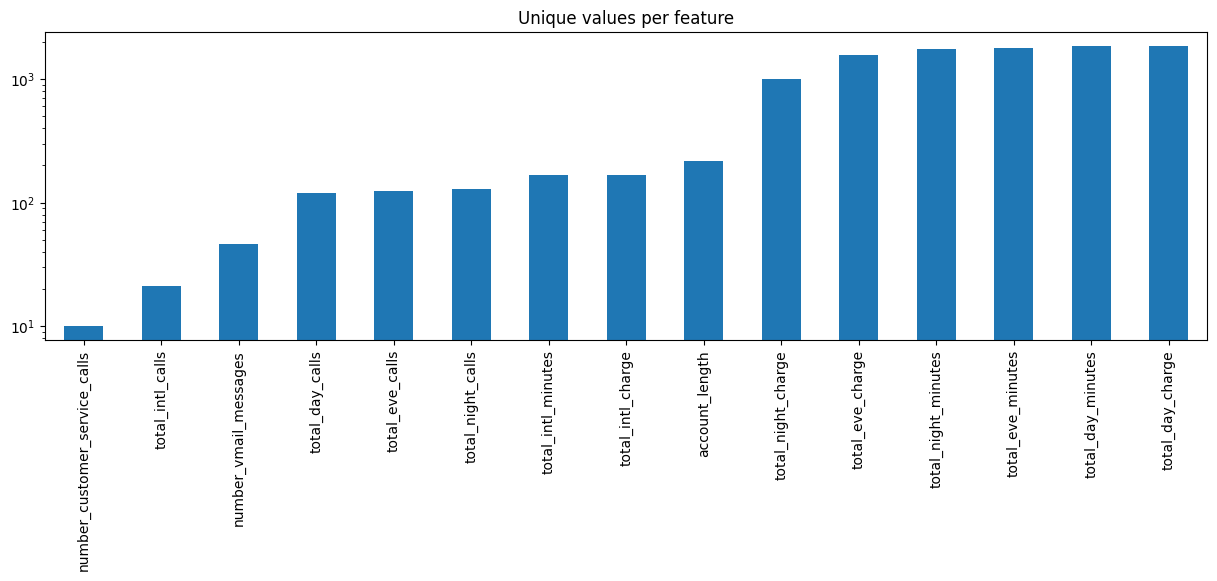

In [18]:
# For each numerical feature compute number of unique entries
unique_values = data_train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( logy=True, figsize=(15, 4), title="Unique values per feature");

### Conclusion

Setiap baris mewakili pelanggan; setiap kolom berisi atribut pelanggan. Dataset "train" berisi 4250 baris (pelanggan) dan 20 kolom (fitur). **Terdapat 15 fitur numerik dan 5 fitur non numerik**. Kolom "Churn" adalah target untuk diprediksi.




Dataset memiliki atribut atau fitur berikut:
1. State: string
2. Account length: integer
3. Area code: integer
4. International plan: string
5. Voice mail plan: string
6. Number vmail messages: integer
7. Total day minutes: double
8. Total day calls: integer
9. Total day charge: double
10. Total eve minutes: double
11. Total eve calls: integer
12. Total eve charge: double
13. Total night minutes: double
14. Total night calls: integer
15. Total night charge: double
16. Total intl minutes: double
17. Total intl calls: integer
18. Total intl charge: double
19. Customer service calls: integer
20. Churn: string

## Data Quality

### Check Duplicate

In [19]:
# Check number of duplicates while ignoring the index feature
n_duplicates = data_train.drop(labels=["state"], axis=1).duplicated().sum()
print(f"Sepertinya Anda memiliki {n_duplicates} duplikat pada dataset.")

Sepertinya Anda memiliki 0 duplikat pada dataset.


dari hasil tersebut, maka tidak dibutuhkan handle duplicate pada tahap preprocessing

### Missing Value

##### Per-sample

In [20]:
data_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

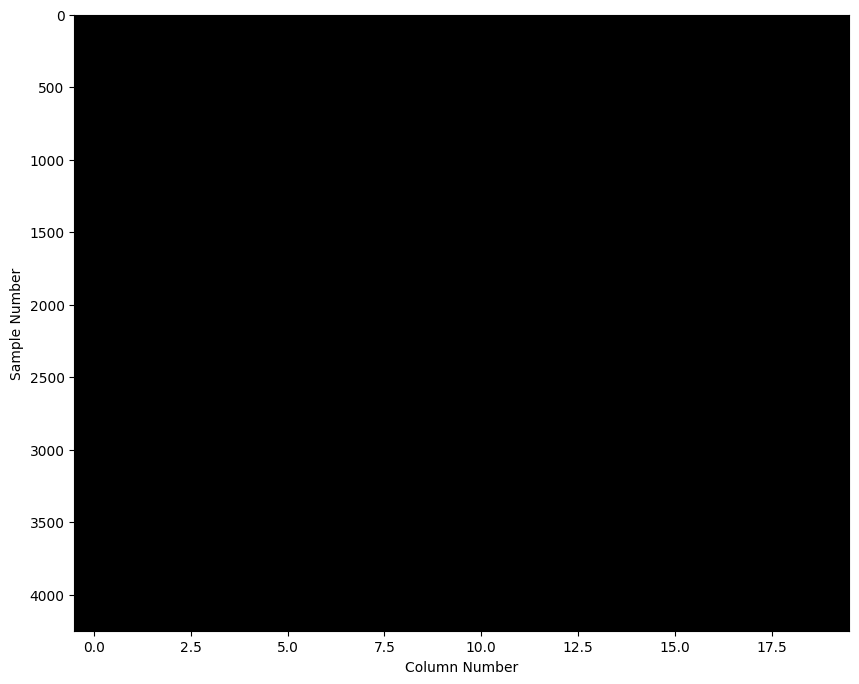

In [21]:
plt.figure(figsize=(10, 8))
plt.imshow(data_train.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

##### Per-features

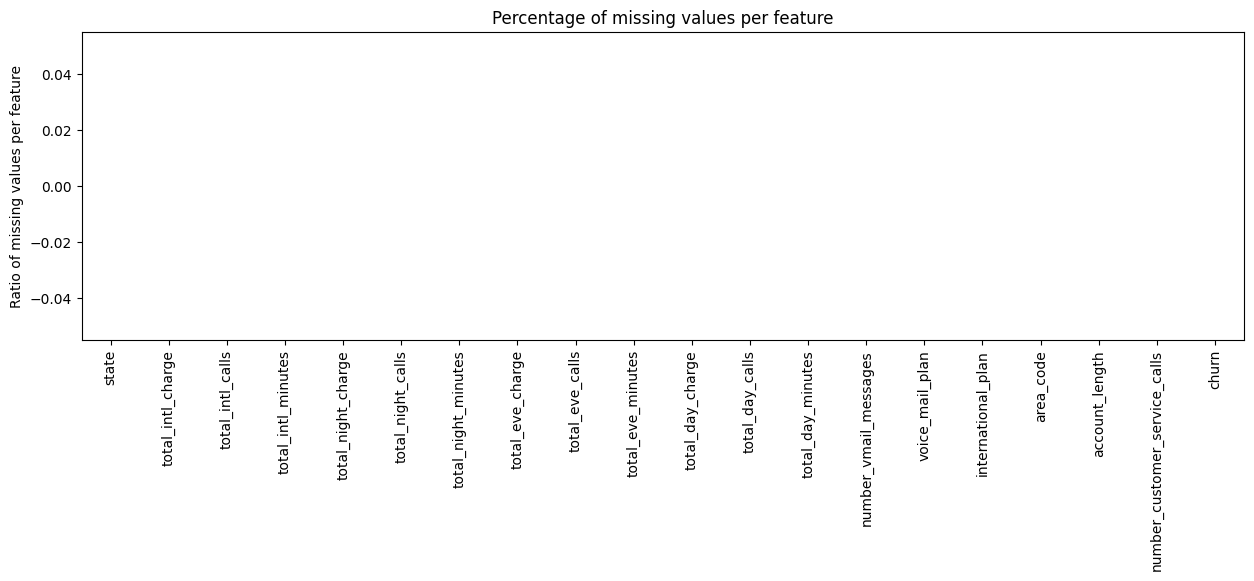

In [22]:
data_train.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

### Unwanted Entries (outliers)

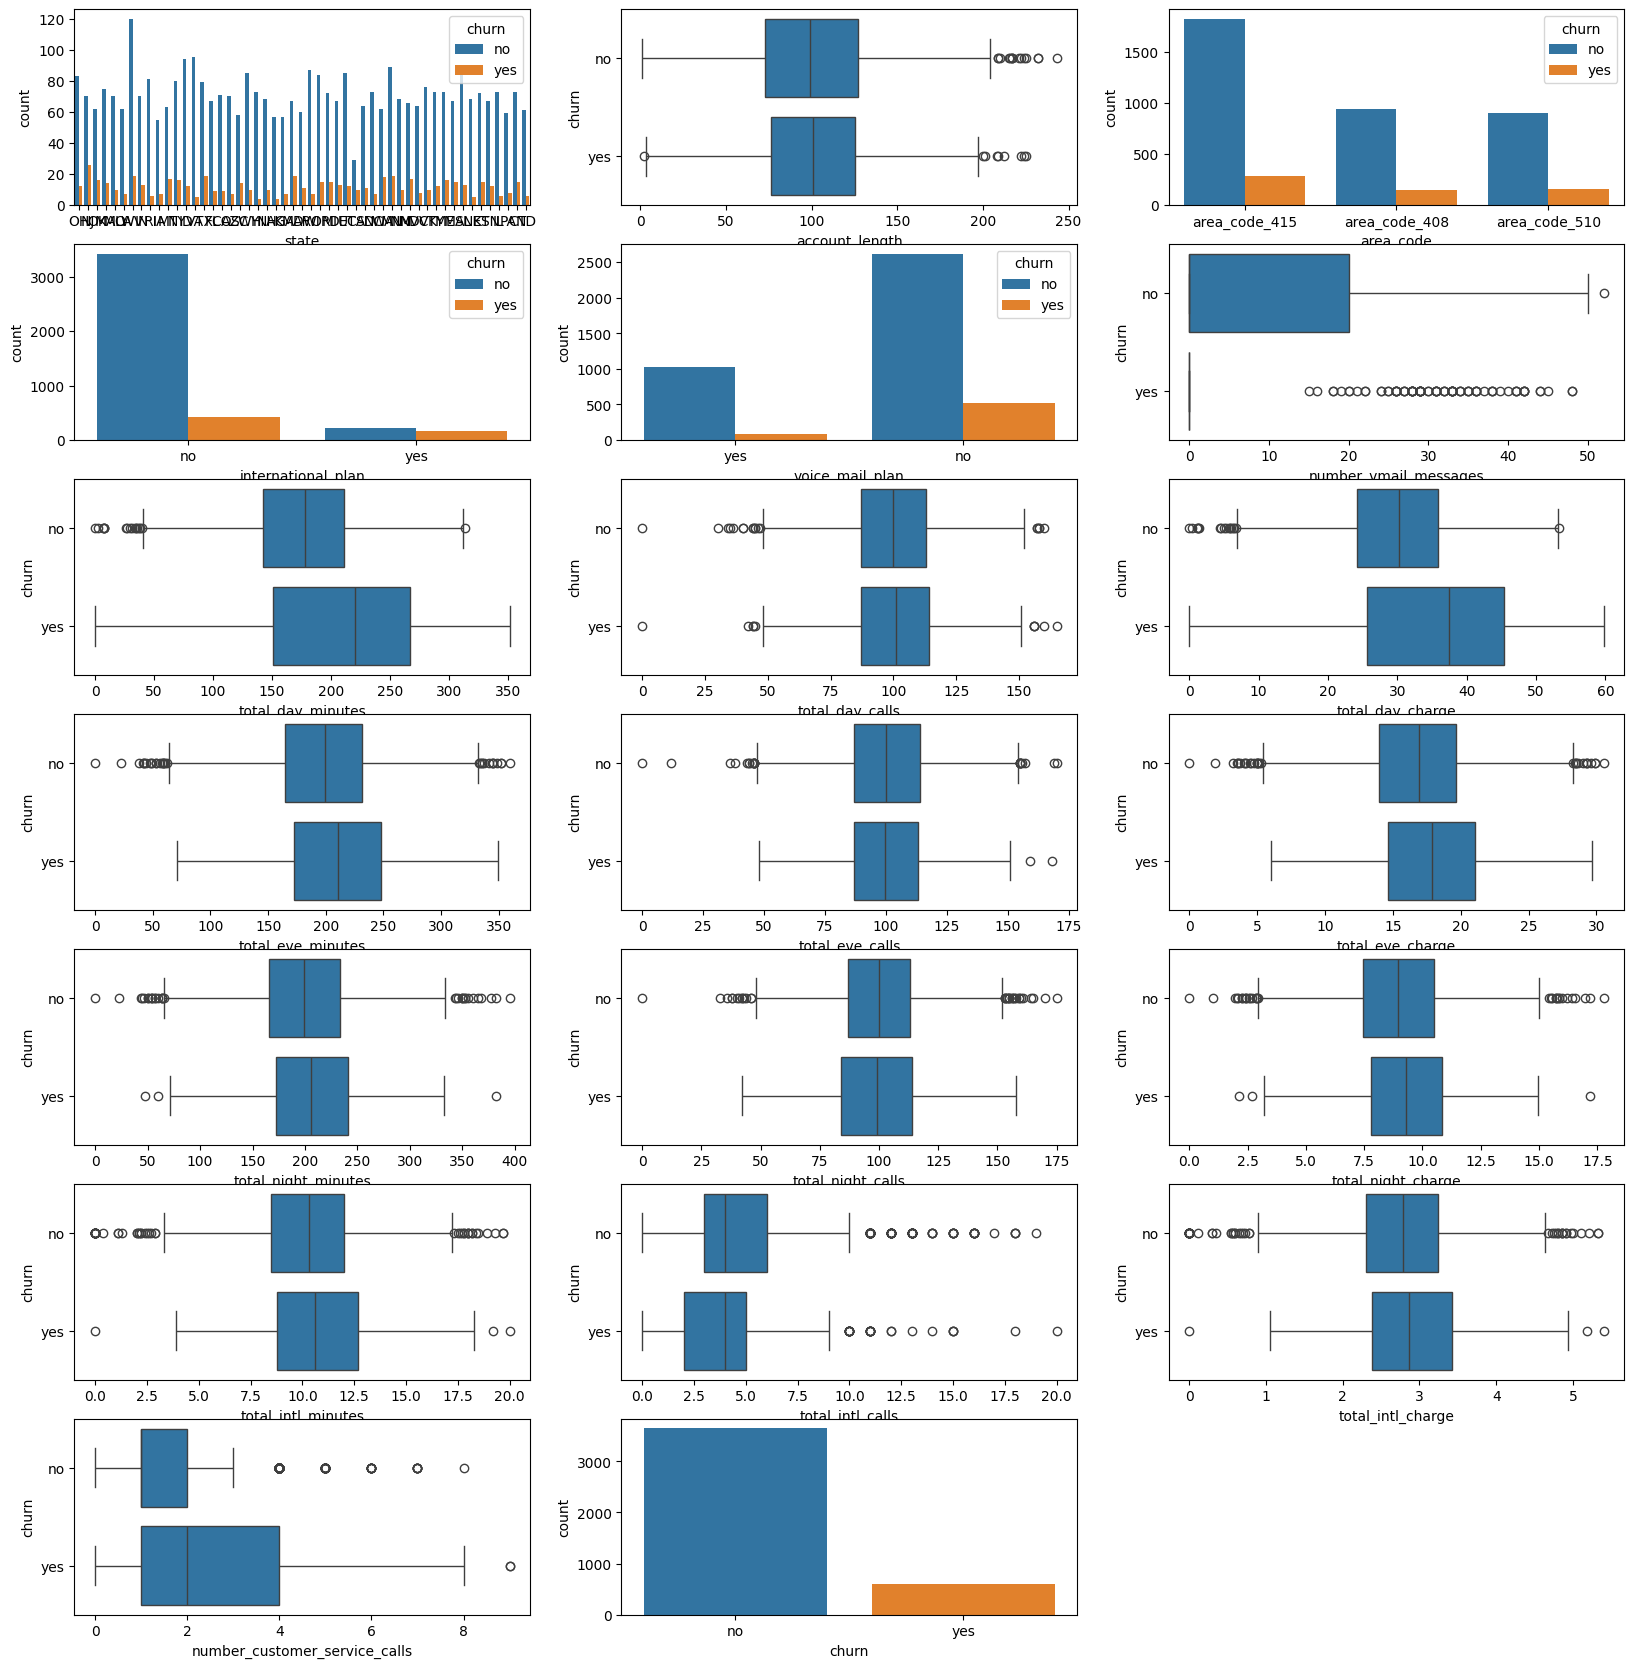

<Figure size 640x480 with 0 Axes>

In [23]:
cols = data_train.columns.tolist()
data_train.churn *= 1

plt.figure(figsize=(20, 30))

for i, variable in enumerate(data_train.columns.tolist()):
    plt.subplot(10, 3, i + 1)
    if data_train.dtypes[variable]=='object':
        sns.countplot(data=data_train, x=variable, hue='churn')
        # plt.savefig('object.png')

    else:
        sns.boxplot(data=data_train, x=variable, y=data_train['churn'].astype('str'))
        # plt.savefig('str.png')

plt.show()
plt.savefig('boxplot.png')

### Conclution Data Quality

Hasil penelitian menunjukkan bahwa kualitas data tidak terpengaruh oleh duplikasi data dan tidak memiliki nilai yang hilang, sehingga preprocessing tidak memerlukan pengendalian duplikasi dan nilai yang hilang. Sebaliknya, membutuhkan *handling Outliers*.

Kode area harus dikategorikan. Kemudian, pada tahap penyelidikan konten, harus melihat semua variabel kategori secara lebih rinci.





## Content

### Feature Distribution

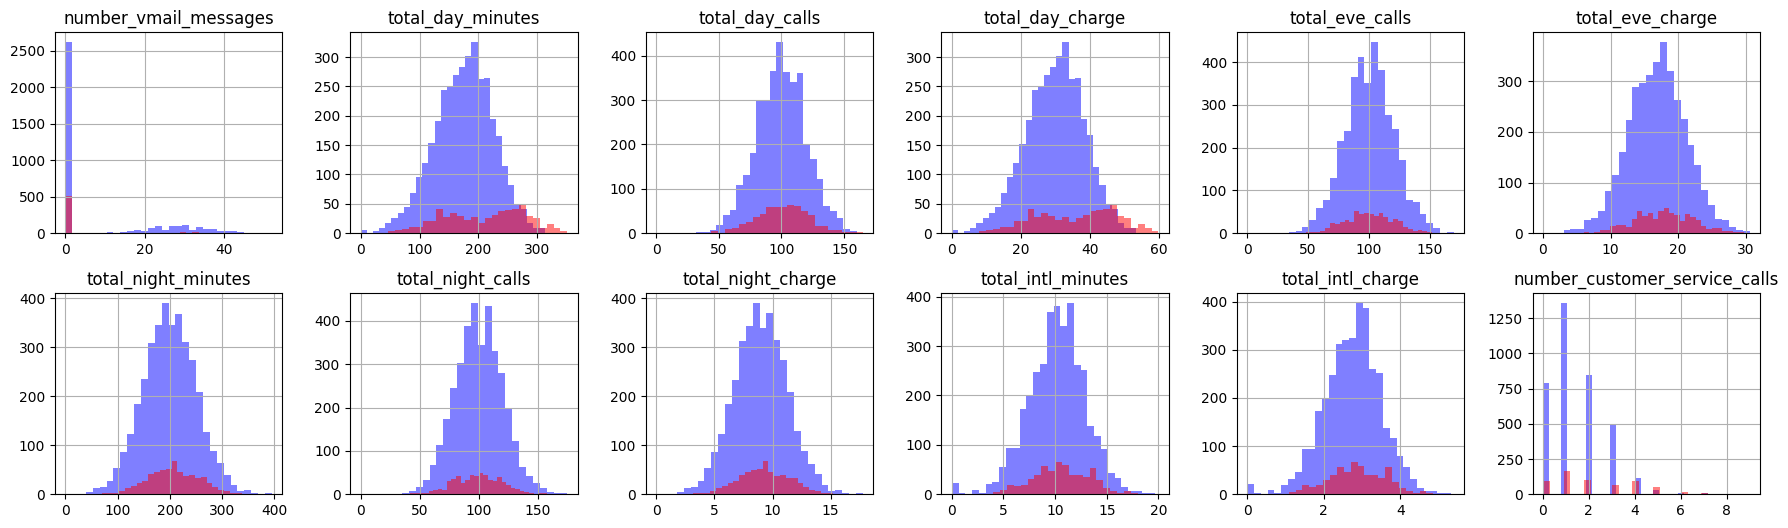

In [24]:
pred_vars = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
             'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
             'total_night_charge', 'total_intl_minutes',
             'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(2, 6, figsize=(22, 6));
data_train[data_train.churn == 'no'][pred_vars].hist( bins=30, color="blue", alpha=0.5, ax=ax);
data_train[data_train.churn == 'yes'][pred_vars].hist( bins=30, color="red", alpha=0.5, ax=ax);

Observasi
Total day minutes dan total day charge hari menunjukkan sedikit lebih banyak churn saat nilainya lebih tinggi

Churn juga lebih tinggi saat panggilan layanan Pelanggan >=3

Data churn menunjukkan data imbalance, sehingga dibutuhkan proses handling imbalance

### Basic Statistic

In [25]:
data_train.churn.map(dict(yes=True, no=False)).mean()
data_train['churn'] = data_train['churn'].map(dict(yes=True, no=False))
data_train['churn'].head()


0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [27]:
#data_train.churn.mean()

0.14070588235294118

In [28]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


 churn rate dari dataset train adalah sekitar 14%

### Feature Exploration

#### churn rate by area code

In [29]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab

,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


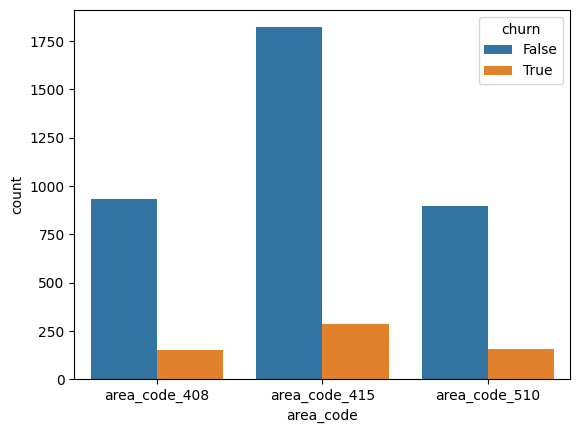

In [30]:
data_train['area_code'] = data_train['area_code'].astype('category')

sns.countplot(data=data_train, x=data_train['area_code'], hue='churn');
plt.savefig('areacode.png')
crosstab_function(data_train,'area_code')

#### churn rate by international plan

,international_plan,churn_no,churn_yes,total,churn Percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


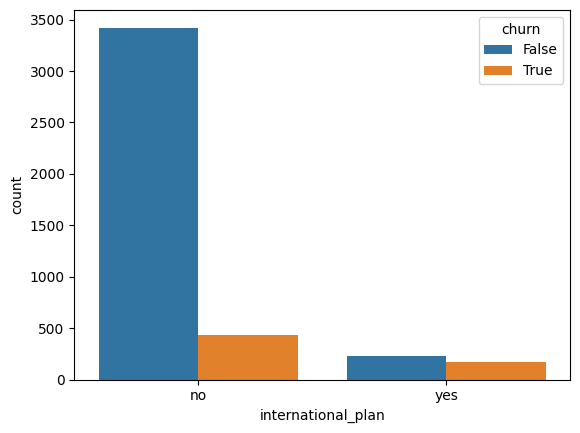

In [31]:
data_train['international_plan'] = data_train['international_plan'].astype('category')

sns.countplot(data=data_train, x=data_train['international_plan'], hue='churn');
plt.savefig('international.png')
crosstab_function(data_train,'international_plan')

#### churn rate by number customer service calls

,number_customer_service_calls,churn_no,churn_yes,total,churn Percentage
0,0,789,97,886,10.948081
1,1,1358,166,1524,10.892388
2,2,845,102,947,10.770855
3,3,495,63,558,11.290323
4,4,117,92,209,44.019139
5,5,32,49,81,60.493827
6,6,9,19,28,67.857143
7,7,6,7,13,53.846154
8,8,1,1,2,50.000000
9,9,0,2,2,100.000000


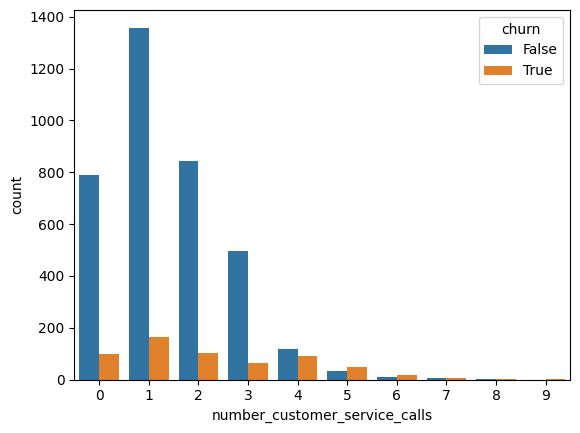

In [34]:
sns.countplot(data=data_train, x=data_train['number_customer_service_calls'], hue='churn');
crosstab_function(data_train,'number_customer_service_calls')

#### churn rate by voice mail plan

,voice_mail_plan,churn_no,churn_yes,total,churn Percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


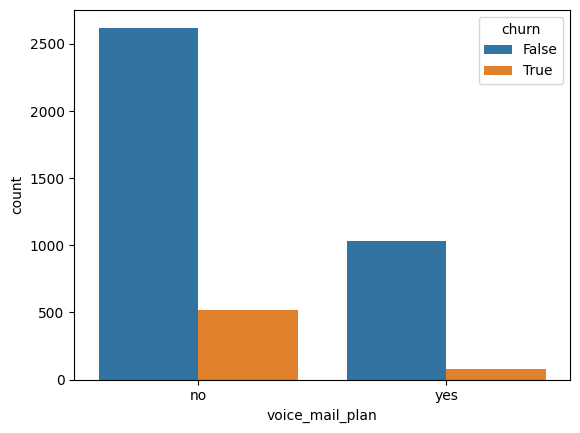

In [35]:
data_train['voice_mail_plan'] = data_train['voice_mail_plan'].astype('category')

sns.countplot(data=data_train, x=data_train['voice_mail_plan'], hue='churn');
plt.savefig('vmplan.png')
crosstab_function(data_train,'voice_mail_plan')

### Feature Relationship

1. Voice mail plan = NO + International plan = YES
2. Customer service calls >= 3 + Total day minutes >= 35

In [36]:
data_train[(data_train['voice_mail_plan']=='no') & (data_train['international_plan']=='yes')].churn.value_counts(1)

False    0.544521
True     0.455479
Name: churn, dtype: float64

In [37]:
data_train[(data_train['number_customer_service_calls']>=4) & (data_train['total_day_minutes']>=35)].churn.value_counts(1)

True     0.505988
False    0.494012
Name: churn, dtype: float64

### Feature Correlations

In [38]:
data_train.corr()

<ipython-input-38-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.046647
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.012699


<ipython-input-39-9ed1e9552c88>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data_train.corr(),annot=True, cmap=cmap);


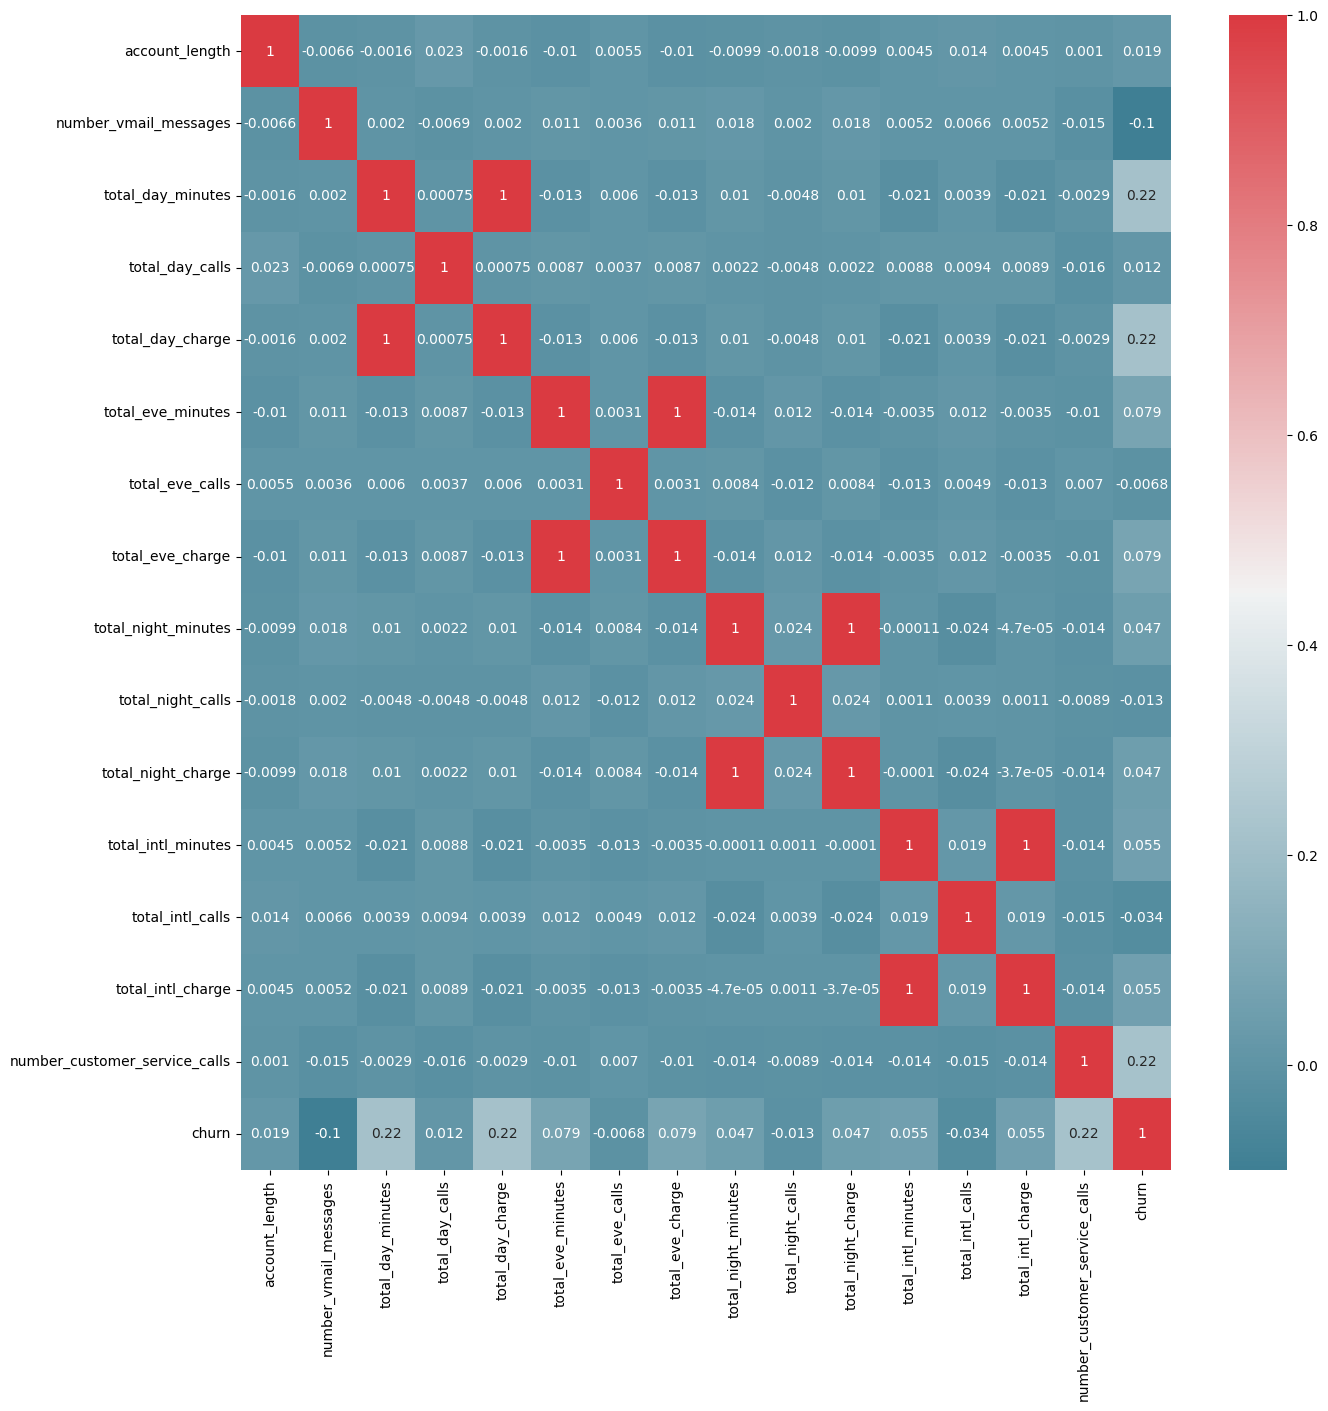

In [39]:
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(221, 11, as_cmap=True)
sns.heatmap( data_train.corr(),annot=True, cmap=cmap);
plt.savefig('heatmap.png')

total_night_charge dan total_night_minutes

total_day_charge dan total_day_minutes

total_intl_charge dan total_intl_minutes

Ini sudah diduga karena orang harus menagih lebih banyak jika mereka menggunakan lebih banyak menit.

# PREPROCESSING

In [40]:
data_train.head().T

,0,1,2,3,4
state,OH,NJ,OH,OK,MA
account_length,107,137,84,75,121
area_code,area_code_415,area_code_415,area_code_408,area_code_415,area_code_510
international_plan,no,no,yes,yes,no
voice_mail_plan,yes,no,no,no,yes
number_vmail_messages,26,0,0,0,24
total_day_minutes,161.6,243.4,299.4,166.7,218.2
total_day_calls,123,114,71,113,88
total_day_charge,27.47,41.38,50.9,28.34,37.09
total_eve_minutes,195.5,121.2,61.9,148.3,348.5


## Handle Outliers

In [41]:
cat_feature = [ 'state','international_plan', 'voice_mail_plan', 'number_customer_service_calls','area_code', 'number_vmail_messages']
num_feature = list(set(data_train.columns) - set(cat_feature)-{'churn'})

In [42]:
num_feature

['total_eve_charge',
 'total_eve_minutes',
 'total_intl_calls',
 'account_length',
 'total_night_charge',
 'total_day_minutes',
 'total_intl_charge',
 'total_night_minutes',
 'total_day_charge',
 'total_night_calls',
 'total_intl_minutes',
 'total_eve_calls',
 'total_day_calls']

In [43]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data_train)}')
filtered_entries = np.array([True] * len(data_train))
for col in num_feature:
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data_train[col] >= low_limit) & (data_train[col] <= high_limit)) & filtered_entries

data_train = data_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3899


## Convert To Numeric

In [46]:
le = LabelEncoder()

data_train['international_plan'] = le.fit_transform(data_train['international_plan'])
data_train['voice_mail_plan'] = le.fit_transform(data_train['voice_mail_plan'])
data_train['churn'] = le.fit_transform(data_train['churn'])

<ipython-input-46-721ec6a58dd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['international_plan'] = le.fit_transform(data_train['international_plan'])
<ipython-input-46-721ec6a58dd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['voice_mail_plan'] = le.fit_transform(data_train['voice_mail_plan'])
<ipython-input-46-721ec6a58dd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [47]:
data_train.head().T

,0,1,3,5,7
state,OH,NJ,OK,MO,WV
account_length,107,137,75,147,141
area_code,area_code_415,area_code_415,area_code_415,area_code_415,area_code_415
international_plan,0,0,1,1,1
voice_mail_plan,1,0,0,0,1
number_vmail_messages,26,0,0,0,37
total_day_minutes,161.6,243.4,166.7,157.0,258.6
total_day_calls,123,114,113,79,84
total_day_charge,27.47,41.38,28.34,26.69,43.96
total_eve_minutes,195.5,121.2,148.3,103.1,222.0


## Convert Categorical

### number customer service calls category

In [48]:
df_final=data_train

In [49]:
df_final_test = data_test

<ipython-input-50-166584aa5e56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['number_customer_service_calls'] = df_final['number_customer_service_calls'].apply(groupcat)


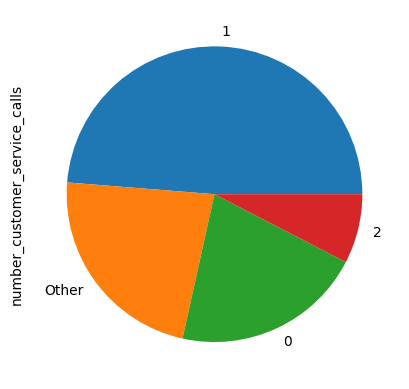

In [50]:
def groupcat(x):
    if x == 0:
        return '0'
    elif x >= 1 | x <= 3:
        return '1'
    elif x >= 4 | x <= 6:
        return '2'
    else:
        return 'Other'

df_final['number_customer_service_calls'] = df_final['number_customer_service_calls'].apply(groupcat)
df_final_test['number_customer_service_calls'] = df_final_test['number_customer_service_calls'].apply(groupcat)
df_final['number_customer_service_calls'].value_counts().plot(kind = 'pie');

### number vmail messages category

<ipython-input-51-104ea1470e14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['number_vmail_messages'] = df_final['number_vmail_messages'].apply(categorizing)


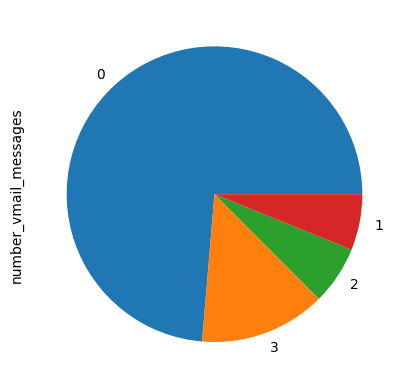

In [51]:
def categorizing(x):
    if x == 0:
        return 0
    elif x < 24:
        return 1
    elif x < 29:
        return 2
    else:
        return 3

df_final['number_vmail_messages'] = df_final['number_vmail_messages'].apply(categorizing)
df_final_test['number_vmail_messages'] = df_final_test['number_vmail_messages'].apply(categorizing)
df_final['number_vmail_messages'].value_counts().plot(kind = 'pie');

In [52]:
feature_cat = ['number_vmail_messages', 'number_customer_service_calls', 'area_code']

In [53]:
df_final = pd.get_dummies(df_final, columns=feature_cat, drop_first=True)
df_final_test = pd.get_dummies(df_final_test, columns=feature_cat, drop_first=True)

In [54]:
df_final.head()

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_charge,churn,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,OH,107,0,1,161.6,123,27.47,195.5,103,16.62,...,3.70,0,0,1,0,1,0,0,1,0
1,NJ,137,0,0,243.4,114,41.38,121.2,110,10.30,...,3.29,0,0,0,0,0,0,0,1,0
3,OK,75,1,0,166.7,113,28.34,148.3,122,12.61,...,2.73,0,0,0,0,1,0,0,1,0
5,MO,147,1,0,157.0,79,26.69,103.1,94,8.76,...,1.92,0,0,0,0,0,0,0,1,0
7,WV,141,1,1,258.6,84,43.96,222.0,111,18.87,...,3.02,0,0,0,1,0,0,0,1,0


In [55]:
df_final.shape

(3899, 25)

## Handle Imbalance

In [56]:
df_final.drop([ 'state'], axis = 1, inplace = True)

In [57]:
X = df_final.drop('churn', axis = 1)
y = df_final['churn']

print(X.shape)
print(y.shape)

(3899, 23)
(3899,)


In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
raw_X, raw_y = sm.fit_resample(X, y)


In [59]:
data = pd.concat([raw_X, raw_y], axis = 1)


In [60]:
data.shape

(6734, 24)

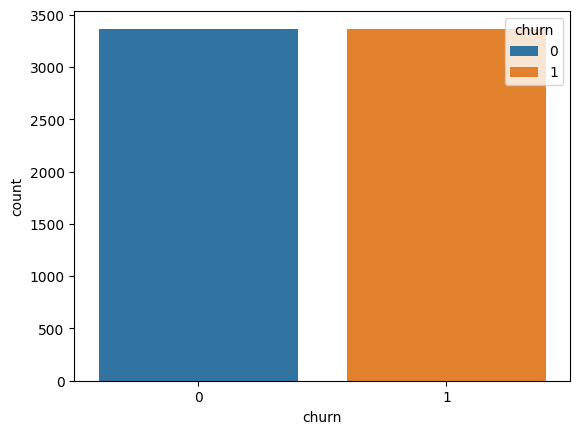

In [61]:
sns.countplot(data=data, x=data['churn'], hue='churn');

## Feature Encoding

In [62]:
scaler = StandardScaler()
df_final_balance = data
df_final_balance[num_feature] = scaler.fit_transform(df_final_balance[num_feature])

In [63]:
df_final_balance.shape

(6734, 24)

In [64]:
X = df_final_balance.drop('churn', axis = 1)
y = df_final_balance['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [65]:
X_train

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
1796,1.284390,0,1,0.653751,0.109392,0.653802,0.612069,0.512820,0.611286,0.266126,...,-0.993886,1.283484,0,1,0,1,0,0,0,0
2872,-0.408158,0,0,0.677217,1.665026,0.677466,-1.105563,-1.319358,-1.105475,1.076460,...,-0.480829,1.067097,0,0,0,0,0,0,0,1
6193,-0.676817,0,0,1.754626,0.609418,1.754825,-0.057969,0.027832,-0.058144,0.252123,...,-0.480829,-0.260035,0,0,0,0,0,0,0,0
4068,-0.945475,0,0,-1.368155,0.776093,-1.368458,0.368483,0.997809,0.369300,1.325976,...,-1.506943,0.733547,0,0,0,0,0,0,0,0
175,1.042598,0,0,-0.960394,0.331626,-0.960236,0.147006,-0.079943,0.146836,-0.206037,...,-0.993886,-0.107577,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,0.451549,0,0,1.475126,0.609418,1.475229,1.102733,-0.349381,1.103303,1.121491,...,-0.480829,0.024838,0,0,0,1,0,0,0,0
2904,0.021695,0,0,-0.254729,0.276067,-0.254279,-0.115496,1.967786,-0.115784,0.147022,...,0.545285,-1.143146,0,0,0,0,0,0,1,0
2290,0.666476,0,0,0.697331,-1.946267,0.697185,0.116002,-0.349381,0.115225,0.155529,...,0.032228,-0.555809,0,0,0,1,0,0,1,0
2979,-0.596219,0,1,-1.169914,-0.668425,-1.170248,0.438446,-1.319358,0.438637,-2.392451,...,0.032228,1.067097,0,1,0,1,0,0,1,0


# MODELLING

In [66]:
models = []
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy')))


In [67]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)

    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,97.52,0.73,92.61,1.32
0,Decision Tree Classifier,87.91,1.40,87.92,1.40


In [68]:
# Model with 81 decision trees
rf = RandomForestClassifier (n_estimators = 81, random_state = 42)
# Training model
rf.fit (X_train, y_train);

In [69]:
y_rf = rf.predict(X_test)
print (pd.crosstab(y_test,y_rf, rownames=['Real'], colnames=['Predicted'], margins=True))

Predicted    0    1   All
Real                     
0          613   52   665
1           64  618   682
All        677  670  1347


In [70]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       665
           1       0.92      0.91      0.91       682

    accuracy                           0.91      1347
   macro avg       0.91      0.91      0.91      1347
weighted avg       0.91      0.91      0.91      1347



In [71]:
# Feature Importance
rf.feature_importances_
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
total_day_minutes,0.122150
total_day_charge,0.112761
number_customer_service_calls_1,0.097246
number_customer_service_calls_Other,0.061412
voice_mail_plan,0.053023
total_eve_charge,0.052282
total_eve_minutes,0.049730
area_code_area_code_415,0.041457
total_night_minutes,0.039116
total_night_charge,0.038227


# PREDICTING

In [72]:
df_final_test.head()
df_state = df_final_test[['id','state']]
df_final_test.drop([ 'id','state'], axis = 1, inplace = True)

In [100]:
df_final_test['international_plan'] = le.fit_transform(df_final_test['international_plan'])
df_final_test['voice_mail_plan'] = le.fit_transform(df_final_test['voice_mail_plan'])

In [74]:
df_final_test.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,0,1,0,1,0,0,1,0
1,118,1,0,223.4,98,37.98,220.6,101,18.75,203.9,...,6,1.70,0,0,0,0,0,0,0,1
2,62,0,0,120.7,70,20.52,307.2,76,26.11,203.0,...,6,3.54,0,0,0,0,1,0,1,0
3,93,0,0,190.7,114,32.42,218.2,111,18.55,129.6,...,3,2.19,0,0,0,1,0,0,0,1
4,174,0,0,124.3,76,21.13,277.1,112,23.55,250.7,...,5,4.19,0,0,0,1,0,0,1,0


In [75]:
predicted = rf.predict(df_final_test)

In [76]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,2,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,2
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,1
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,1


In [77]:
submission = pd.DataFrame({
        "id": data_test["id"],
        "churn_result": predicted
    })
submission.head()

,id,churn_result
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1


In [78]:
submission['churn'] = submission['churn_result'].map({ 0: 'no', 1: 'yes' })
submission.head()

,id,churn_result,churn
0,1,0,no
1,2,1,yes
2,3,1,yes
3,4,1,yes
4,5,1,yes


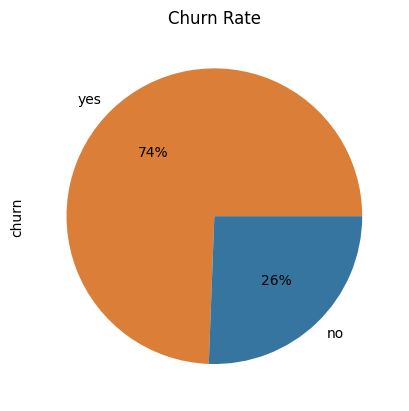

In [79]:
submission['churn'].value_counts().plot(title = 'Churn Rate', kind = 'pie', autopct='%1.0f%%', colors=['#DB7E37','#36759F']);
plt.savefig('churn_persen.png')

In [95]:
data_test['churn'] = submission['churn']
data_test.head().T

,0,1,2,3,4
id,1,2,3,4,5
state,KS,AL,IA,VT,NE
account_length,128,118,62,93,174
area_code,area_code_415,area_code_510,area_code_415,area_code_510,area_code_415
international_plan,no,yes,no,no,no
voice_mail_plan,yes,no,no,no,no
number_vmail_messages,2,0,0,0,0
total_day_minutes,265.1,223.4,120.7,190.7,124.3
total_day_calls,110,98,70,114,76
total_day_charge,45.07,37.98,20.52,32.42,21.13


In [96]:
data_test['churn'] = data_test['churn'].map(dict(yes=True, no=False))
data_test['churn'].head()

0    False
1     True
2     True
3     True
4     True
Name: churn, dtype: bool

In [97]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab

In [98]:
data_test.churn.mean()

0.744

,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,40,133,173,76.878613
1,area_code_415,100,287,387,74.160207
2,area_code_510,52,138,190,72.631579
3,All,192,558,750,74.400000


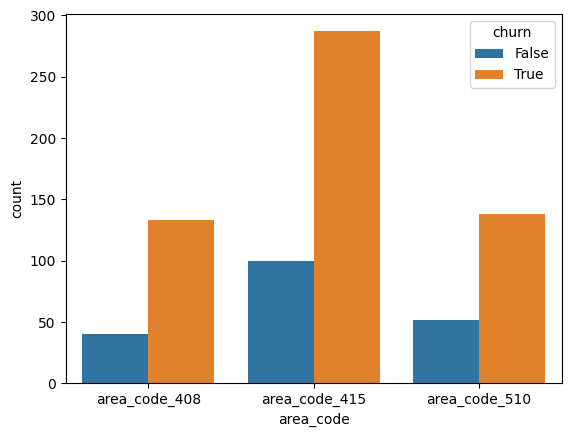

In [99]:
data_test['area_code'] = data_test['area_code'].astype('category')
sns.countplot(data=data_test, x=data_test['area_code'], hue='churn');
crosstab_function(data_test,'area_code')